# Práctica Tema 4: Aprendizaje automático


## Sistemas Inteligentes 

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. 

Los ejercicios propuestos se resolverán en este mismo notebook que se entregara en la tarea de entrega habilitada en el Campus  Virtual.

__Lo primero que tenéis que hacer es ejecutar los notebooks para familiarizados con las librerías numpy, pandas y sklearn y con los procesos de carga, análisis y visualización de datos__

En esta práctica se os pide replicar estos procesos C, construir modelos con otros datos. Lo más importante en esta práctica es el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No cuenta para nada poner los trozos de código o gráficas sin explicación__.

Para que los resultados no varíen entre distintas ejecuciones recuerda establecer el parámetro `random_state` para que tenga el mismo valor en todas las funciones que tomen decisiones aleatorias.

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

# Parte 1: Clustering

In [79]:
RANDOM_STATE=333

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países indicando index_col=0 al leer el archivo csv. 
Echa un vistazo a los datos, verás que todos los datos son numéricos menos la Región. Elimina con la operación drop la columna `Region` por ser categórica. 
Elimina todas las filas en las que faltan valores usando la operación `dropna`.
Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [1]:
import pandas as pd


## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...). 

Utiliza describe() para calcular los estadísticos, corr() para calcular los coeficientes de correlación y la librería seaborn para dibujar (pairplot) el diagrama de dispersión (tipo kde)

## 3) Preprocesar los datos

Vamos a utilizar los algoritmos jerárquico aglomerativo y k-Means para encontrar grupos de países similares. 
k-means es muy sensible a las escalas, por lo que vamos a ajustar las escalas de los datos conMinMaxScaler. No procede la estandarizarlos (StandarScaler) porque no siguen distribuciones normales. 
Para ello accedemos al array interno del dataframe y creamos un nuevo array con los datos escalados que será el que utilizaremos en los algoritmos de clustering. 

###  Aplicamos los algoritmos de clustering con una configuración sin optimizar

In [8]:
# Podeis usar la siguiiente función plot_clusters para dibujar los clusters. 

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

Después de aplicar clustering con numero de clusters=5, al visualizar con plot_clusters() obtendrás algo como esto:
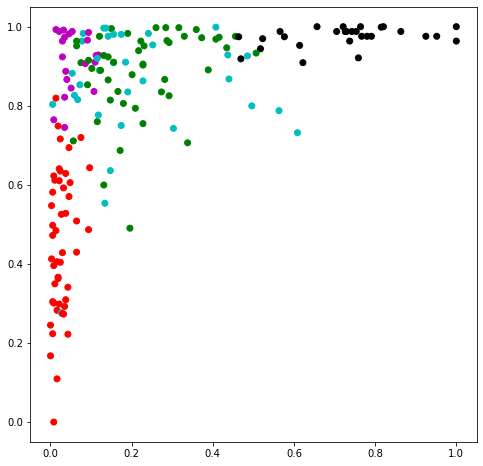

## 4) Encontrar el número óptimo de clusters

Como el número de clusters es un parámetro de entrada queremos decidir __razonadamente__ el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo y el índice davies_boulding en función del número de clusters. 

¿Qué número de clusters sería el óptimo según los diagramas anteriores?  RAZONA LA RESPUESTA.


In [10]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score




## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Estudia al menos uno de los clusters a través de sus descriptores estadísticos.
Pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. 
Como al principio hemos escalado los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. 
creamos una nueva columna para añadir la clase que le ha asignado el algoritmo a cada fila de la tabla de la siguiente forma:

    df = df.copy()
    df['cluster'] = km.labels_

# Parte 2: Clasificación

Para esta segunda parte vamos a usar un conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

## 3) Crea el modelo de árbol de decisión con profundidad 3

Si se construye el árbol completo se puede producir sobreaprendizaje. 
Aunque no lo vamos a hacer, podemos calcular con validación cruzada cual es la profundidad óptima.
Entrenando y validandos varios árboles con distintas profundidades máximas

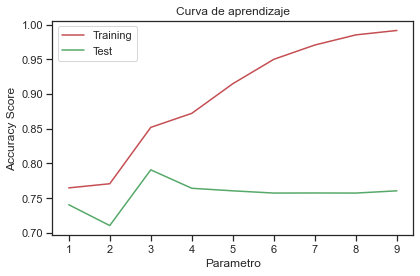
En el gráfico se ve que el mejor valor de profundidad para evitar el sobreaprendizaje es 3.

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. 


Analiza razonadamente:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

Nota: Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. 
Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`)
y otro array que sólo contenga la variable de salida. Estos dos arrays son los dos parámetros que necesita el .fit() del modelo de clasificación con el árbol de decisión.

    X = df.drop(['target'], axis=1).values
    Y = df['target'].values

## 4) Estudia el error de clasificación de este árbol 

Vamos a calcular la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol (3) y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

# Parte 3: Regresión

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos dado `airbnb.csv` en un dataframe. Describe el conjunto de datos y estudia la distribución de precios.

- `accommodates`: número máximo de personas permitido.
- `bathrooms` y `bedrooms`: baño y dormitorios.
- `guests_included`: inquilinos incluidos en el precio, por encima hay que pagas un extra.
- `host_listings_count`: número de establecimientos alquilados por el mismo propietario.
- `latitude`y `longitude`: situación geográfica.
- `minimum_nights`: mínimo número de noches que se pueden alquilar.
- `number_of_reviews`: números de comentarios en la plataforma de anteriores inquilinos.
- `distance_centre`: distancia al centro de la ciudad.
- `instant_bookable`: si se puede reservar directamente en la web.
- `entire_home`, `private_room` y `shared_room`: casa entera, habitación o habitación compartida.

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. 
Vamos a crear un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa). Será este dataframe el que utilizaremos después. 


## 3) Entrenamiento 

Crea una red neuronales de tipo Perceptrón Multicapa con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. 
Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).



## 4) Medición del error

Con el modelo fijando el coeficiente de regulación decidido en el apartado anterior usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Dibuja un histograma con la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?